/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


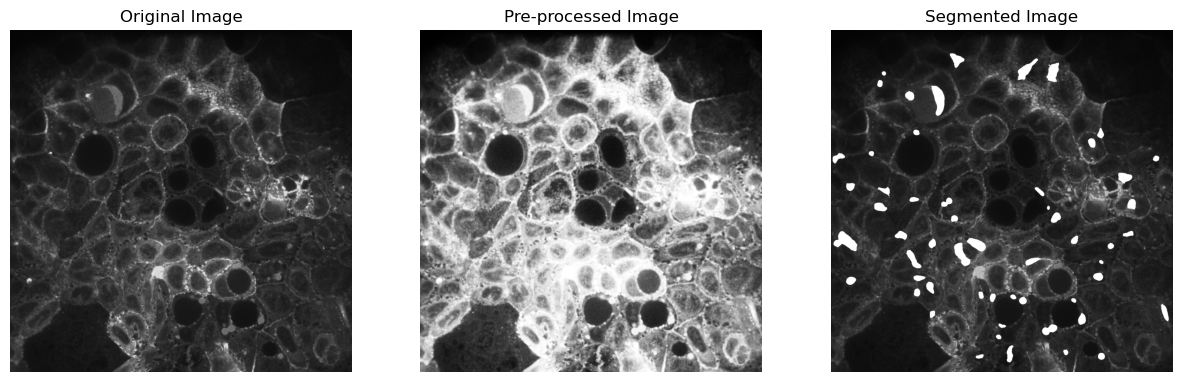

True

In [1]:
import cv2
import numpy as np
from cellpose import models, plot
import matplotlib.pyplot as plt

# Step 1: Load the image
image_path = r"/home/amaschio/kuPhysics/aml/image/control/004_z62.png"
  # Replace with your image file path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Step 2: Pre-process the image
# Apply a Gaussian Blur to reduce noise
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Enhance contrast using histogram equalization
equalized_image = cv2.equalizeHist(blurred_image)

# Step 3: Segment the image using Cellpose
# Initialize the Cellpose model (pre-trained on nuclei)
model = models.Cellpose(gpu=False, model_type='nuclei')

# Run the model on the pre-processed image
masks, flows, styles, diams = model.eval(equalized_image, diameter=None, channels=[0, 0])

# Step 4: Post-process the segmented image (optional)
# For better visualization, we can overlay the masks on the original image
overlay = image.copy()
overlay[masks > 0] = 255  # Highlight the segmented regions

# Visualize the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(equalized_image, cmap='gray')
axes[1].set_title('Pre-processed Image')
axes[1].axis('off')

axes[2].imshow(overlay, cmap='gray')
axes[2].set_title('Segmented Image')
axes[2].axis('off')

plt.show()

# Save the result if needed
cv2.imwrite('segmented_image.png', overlay)


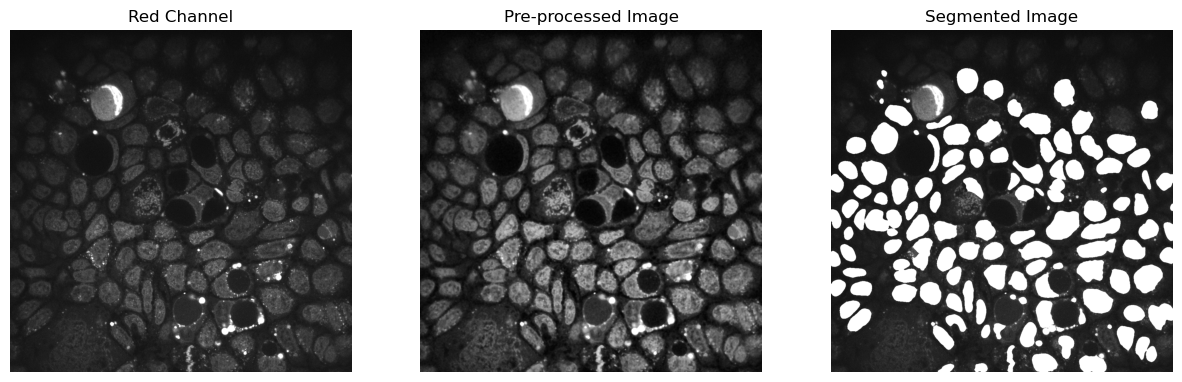

True

In [2]:
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Check if the image was loaded successfully
if image is None:
    raise FileNotFoundError(f"Image file not found at {image_path}")

# Extract the red channel (assuming red channel is the nuclei)
red_channel = image[:, :, 2]

# Step 2: Pre-process the image
# Apply a median filter to reduce noise
median_filtered_image = cv2.medianBlur(red_channel, 5)

# Enhance contrast using adaptive histogram equalization
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced_image = clahe.apply(median_filtered_image)

# Step 3: Segment the image using Cellpose
# Initialize the Cellpose model with GPU support
model = models.Cellpose(gpu=True, model_type='nuclei')

# Estimate the diameter of nuclei if needed (e.g., using a pre-run Cellpose or known value)
diameter = 40  # Adjust this value based on your image characteristics

# Run the model on the pre-processed image
masks, flows, styles, diams = model.eval(enhanced_image, diameter=diameter, channels=[0, 0])

# Step 4: Post-process the segmented image (optional)
# For better visualization, we can overlay the masks on the original image
overlay = red_channel.copy()
overlay[masks > 0] = 255  # Highlight the segmented regions

# Visualize the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(red_channel, cmap='gray')
axes[0].set_title('Red Channel')
axes[0].axis('off')

axes[1].imshow(enhanced_image, cmap='gray')
axes[1].set_title('Pre-processed Image')
axes[1].axis('off')

axes[2].imshow(overlay, cmap='gray')
axes[2].set_title('Segmented Image')
axes[2].axis('off')

plt.show()

# Save the result if needed
cv2.imwrite('segmented_image.png', overlay)

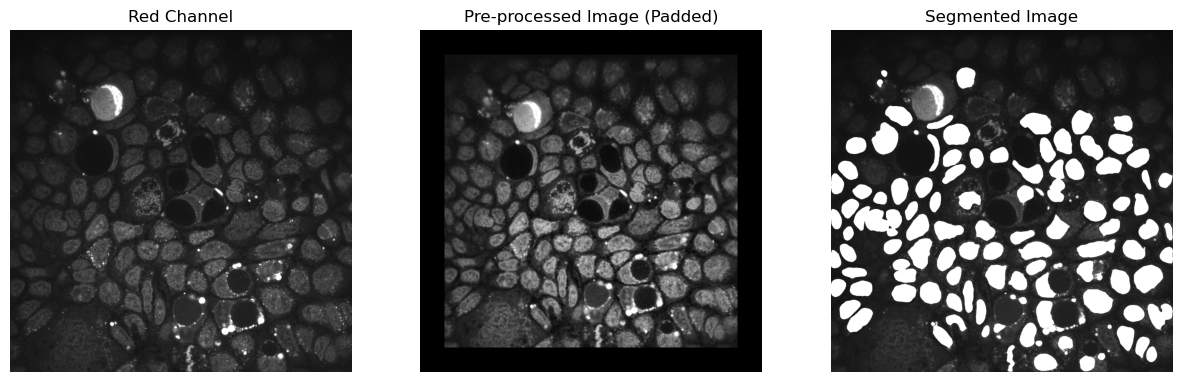

Number of nuclei detected: 119


True

In [5]:
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Check if the image was loaded successfully
if image is None:
    raise FileNotFoundError(f"Image file not found at {image_path}")

# Extract the red channel (assuming red channel is the nuclei)
red_channel = image[:, :, 2]

# Step 2: Pre-process the image
# Add padding to the image to help with border nuclei detection
padding_size = 100  # Adjust padding size if necessary
padded_image = cv2.copyMakeBorder(red_channel, padding_size, padding_size, padding_size, padding_size, 0)

# Apply a median filter to reduce noise
median_filtered_image = cv2.medianBlur(padded_image, 5)

# Enhance contrast using adaptive histogram equalization
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced_image = clahe.apply(median_filtered_image)

# Step 3: Segment the image using Cellpose
# Initialize the Cellpose model with GPU support
model = models.Cellpose(gpu=True, model_type='nuclei')

# Estimate the diameter of nuclei if needed (e.g., using a pre-run Cellpose or known value)
diameter = 40  # Adjust this value based on your image characteristics

# Run the model on the pre-processed image
masks, flows, styles, diams = model.eval(enhanced_image, diameter=diameter, channels=[0, 0])

nuclei_count = np.max(masks)

# Remove the padding from the masks
masks = masks[padding_size:-padding_size, padding_size:-padding_size]

# Step 4: Post-process the segmented image (optional)
# For better visualization, we can overlay the masks on the original image
overlay = red_channel.copy()
overlay[masks > 0] = 255  # Highlight the segmented regions

# Visualize the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(red_channel, cmap='gray')
axes[0].set_title('Red Channel')
axes[0].axis('off')

axes[1].imshow(enhanced_image, cmap='gray')
axes[1].set_title('Pre-processed Image (Padded)')
axes[1].axis('off')

axes[2].imshow(overlay, cmap='gray')
axes[2].set_title('Segmented Image')
axes[2].axis('off')

plt.show()

print(f"Number of nuclei detected: {nuclei_count}")

# Save the result if needed
cv2.imwrite('segmented_image.png', overlay)

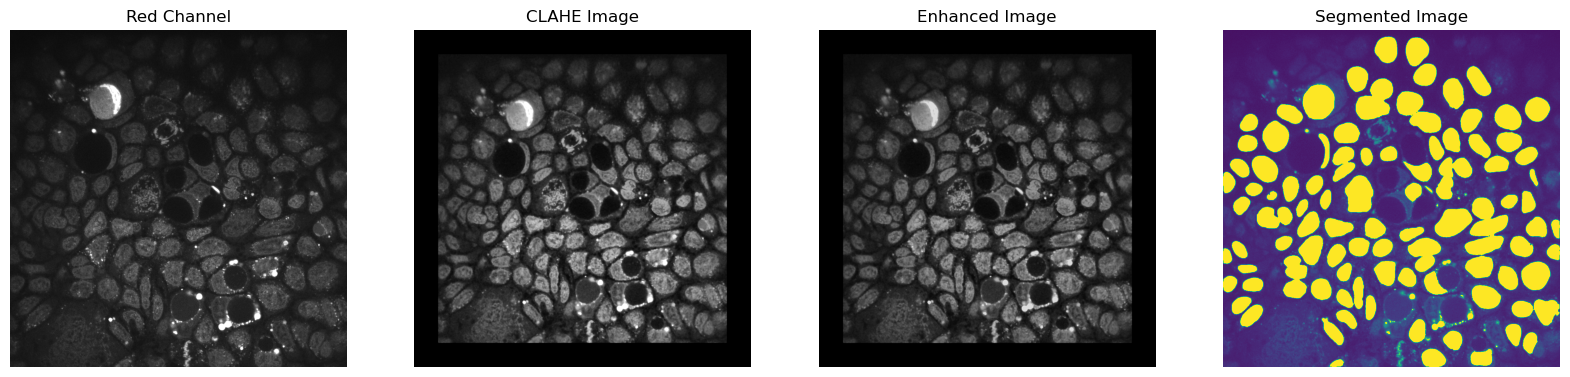

True

In [6]:
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Check if the image was loaded successfully
if image is None:
    raise FileNotFoundError(f"Image file not found at {image_path}")

# Extract the red channel (assuming red channel is the nuclei)
red_channel = image[:, :, 2]

# Step 2: Pre-process the image
# Add padding to the image to help with border nuclei detection
padding_size = 100  # Adjust padding size if necessary
padded_image = cv2.copyMakeBorder(red_channel, padding_size, padding_size, padding_size, padding_size,0)

# Apply a median filter to reduce noise
median_filtered_image = cv2.medianBlur(padded_image, 5)

# Enhance contrast using adaptive histogram equalization (CLAHE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(median_filtered_image)

# Apply edge detection to emphasize nuclei boundaries
laplacian = cv2.Laplacian(clahe_image, cv2.CV_64F)
laplacian_abs = np.absolute(laplacian)
laplacian_8u = np.uint8(laplacian_abs)

# Combine CLAHE image and Laplacian edge detection
enhanced_image = cv2.addWeighted(clahe_image, 0.8, laplacian_8u, 0.2, 0)

# Step 3: Segment the image using Cellpose
# Initialize the Cellpose model with GPU support
model = models.Cellpose(gpu=True, model_type='nuclei')

# Estimate the diameter of nuclei if needed (e.g., using a pre-run Cellpose or known value)
diameter = 80  # Adjust this value based on your image characteristics

# Run the model on the pre-processed image
masks, flows, styles, diams = model.eval(enhanced_image, diameter=diameter, channels=[0, 0])

# Remove the padding from the masks
masks = masks[padding_size:-padding_size, padding_size:-padding_size]

# Step 4: Post-process the segmented image (optional)
# For better visualization, we can overlay the masks on the original image
overlay = red_channel.copy()
overlay[masks > 0] = 255  # Highlight the segmented regions

# Visualize the results
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[0].imshow(red_channel, cmap='gray')
axes[0].set_title('Red Channel')
axes[0].axis('off')

axes[1].imshow(clahe_image, cmap='gray')
axes[1].set_title('CLAHE Image')
axes[1].axis('off')

axes[2].imshow(enhanced_image, cmap='gray')
axes[2].set_title('Enhanced Image')
axes[2].axis('off')

axes[3].imshow(overlay, cmap='viridis')
axes[3].set_title('Segmented Image')
axes[3].axis('off')

plt.show()

# Save the result if needed
cv2.imwrite('segmented_image.png', overlay)

In [ ]:
from cuml.cluster import DBSCAN as cumlDBSCAN


image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Check if the image was loaded successfully
if image is None:
    raise FileNotFoundError(f"Image file not found at {image_path}")

# Extract the red channel (assuming red channel is the nuclei)
red_channel = image[:, :, 2]

# Step 2: Pre-process the image
# Add padding to the image to help with border nuclei detection
padding_size = 50  # Adjust padding size if necessary
padded_image = cv2.copyMakeBorder(red_channel, padding_size, padding_size, padding_size, padding_size, 0)

# Apply a median filter to reduce noise
median_filtered_image = cv2.medianBlur(padded_image, 5)

# Enhance contrast using adaptive histogram equalization (CLAHE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(median_filtered_image)

# Apply edge detection to emphasize nuclei boundaries
# laplacian = cv2.Laplacian(clahe_image, cv2.CV_64F)
# laplacian_abs = np.absolute(laplacian)
# laplacian_8u = np.uint8(laplacian_abs)

# # Combine CLAHE image and Laplacian edge detection
# enhanced_image = cv2.addWeighted(clahe_image, 0.8, laplacian_8u, 0.2, 0)

# Step 3: Apply cumlDBSCAN to enhance faded nuclei
# Reshape the image for clustering
print("starting reshape")
X = clahe_image.reshape(-1, 1).astype(np.float32)
print("start DBSCAN")

# Apply DBSCAN clustering
dbscan = cumlDBSCAN(eps=0.1, min_samples=5)
labels = dbscan.fit_predict(X)

# Reshape the labels back to the image shape
labels_image = labels.reshape(enhanced_image.shape)
print("start DBSCAN image")

# Enhance the nuclei by setting the clustered regions to maximum intensity
dbscan_enhanced_image = np.where(labels_image == -1, enhanced_image, 255)

plt.imshow(dbscan_enhanced_image, cmap='gray')
plt.show()

# Step 4: Segment the image using Cellpose
# Initialize the Cellpose model with GPU support
model = models.Cellpose(gpu=True, model_type='nuclei')

# Estimate the diameter of nuclei if needed (e.g., using a pre-run Cellpose or known value)
diameter = 40  # Adjust this value based on your image characteristics

# Run the model on the pre-processed image
masks, flows, styles, diams = model.eval(dbscan_enhanced_image, diameter=diameter, channels=[0, 0])

# Remove the padding from the masks
masks = masks[padding_size:-padding_size, padding_size:-padding_size]

# Step 5: Post-process the segmented image (optional)
# For better visualization, we can overlay the masks on the original image
overlay = red_channel.copy()
overlay[masks > 0] = 255  # Highlight the segmented regions

# Visualize the results
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[0].imshow(red_channel, cmap='gray')
axes[0].set_title('Red Channel')
axes[0].axis('off')

axes[1].imshow(clahe_image, cmap='gray')
axes[1].set_title('CLAHE Image')
axes[1].axis('off')

axes[2].imshow(dbscan_enhanced_image, cmap='gray')
axes[2].set_title('DBSCAN Enhanced Image')
axes[2].axis('off')

axes[3].imshow(overlay, cmap='gray')
axes[3].set_title('Segmented Image')
axes[3].axis('off')

plt.show()

# Save the result if needed
cv2.imwrite('segmented_image.png', overlay)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Load the image
# image_path = "your_image_path.jpg"
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Check if the image was loaded successfully
if image is None:
    raise FileNotFoundError(f"Image file not found at {image_path}")

# Extract the red channel (assuming red channel is the nuclei)
red_channel = image[:, :, 2]

# Step 2: Pre-process the image
# Add padding to the image to help with border nuclei detection
padding_size = 100  # Adjust padding size if necessary
padded_image = cv2.copyMakeBorder(red_channel, padding_size, padding_size, padding_size, padding_size, 0)

# Apply a median filter to reduce noise
median_filtered_image = cv2.medianBlur(padded_image, 5)

# Enhance contrast using adaptive histogram equalization (CLAHE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(median_filtered_image)

# Apply edge detection to emphasize nuclei boundaries
laplacian = cv2.Laplacian(clahe_image, cv2.CV_64F)
laplacian_abs = np.absolute(laplacian)
laplacian_8u = np.uint8(laplacian_abs)

# Combine CLAHE image and Laplacian edge detection
enhanced_image = cv2.addWeighted(clahe_image, 0.8, laplacian_8u, 0.2, 0)

# Step 3: Segment the image using Cellpose
# Initialize the Cellpose model with GPU support
model = models.Cellpose(gpu=True, model_type='nuclei')

# Estimate the diameter of nuclei if needed (e.g., using a pre-run Cellpose or known value)
diameter = 80  # Adjust this value based on your image characteristics

# Run the model on the pre-processed image
masks, flows, styles, diams = model.eval(enhanced_image, diameter=diameter, channels=[0, 0])

# Remove the padding from the masks
masks = masks[padding_size:-padding_size, padding_size:-padding_size]

# Step 4: Apply DBSCAN to enhance faded spots
# Reshape the image into a 2D array
reshaped_image = masks.reshape((-1, 1))

# Apply DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=10)  # Adjust parameters accordingly
dbscan.fit(reshaped_image)

# Get the labels assigned by DBSCAN
labels = dbscan.labels_

# Assign colors to clusters for visualization
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(set(labels)))]

# Create an output image to visualize clusters
clustered_image = np.zeros_like(masks, dtype=np.uint8)

for i in range(len(labels)):
    if labels[i] == -1:
        clustered_image.flat[i] = 255  # Assign white color to noise points
    else:
        clustered_image.flat[i] = int(255 * (labels[i] / len(set(labels))))  # Assign colors to clusters

# Step 5: Visualize the results
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
axes[0].imshow(red_channel, cmap='gray')
axes[0].set_title('Red Channel')
axes[0].axis('off')

axes[1].imshow(clahe_image, cmap='gray')
axes[1].set_title('CLAHE Image')
axes[1].axis('off')

axes[2].imshow(enhanced_image, cmap='gray')
axes[2].set_title('Enhanced Image')
axes[2].axis('off')

axes[3].imshow(masks, cmap='gray')
axes[3].set_title('Segmented Image')
axes[3].axis('off')

axes[4].imshow(clustered_image, cmap='jet')
axes[4].set_title('Clustered Image')
axes[4].axis('off')

plt.show()

# Save the result if needed
cv2.imwrite('clustered_image.png', clustered_image)


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from cuml import DBSCAN
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from skimage import morphology

# Load the image
# image_path = 'your_image.jpg'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Check if the image was loaded successfully
if image is None:
    raise FileNotFoundError(f"Image file not found at {image_path}")

# Extract the red channel (assuming red channel is the nuclei)
red_channel = image[:, :, 2]

# Convert to float32 for cuml compatibility
red_channel_float = red_channel.astype(np.float32)

# Step 2: Pre-process the image
# Add padding to the image to help with border nuclei detection
# padding_size = 100  # Adjust padding size if necessary
# padded_image = cv2.copyMakeBorder(red_channel_float, padding_size, padding_size, padding_size, padding_size, 0)

# # Apply a median filter to reduce noise
# median_filtered_image = cv2.medianBlur(padded_image, 5)

# # Enhance contrast using adaptive histogram equalization (CLAHE)
# clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
# clahe_image = clahe.apply(median_filtered_image)

# # Apply edge detection to emphasize nuclei boundaries
# laplacian = cv2.Laplacian(clahe_image, cv2.CV_64F)
# laplacian_abs = np.absolute(laplacian)
# laplacian_8u = np.uint8(laplacian_abs)

# # Combine CLAHE image and Laplacian edge detection
# enhanced_image = cv2.addWeighted(clahe_image, 0.8, laplacian_8u, 0.2, 0)

# Step 3: Apply DBSCAN to enhance faded spots
# Reshape the image into a feature matrix suitable for clustering
reshaped_image = red_channel_float.reshape(-1, 1)

# Initialize DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)

# Fit DBSCAN to the data
cluster_labels = dbscan.fit_predict(reshaped_image)

# Step 4: Post-process the segmented image
# Reshape the cluster labels to the original image shape
cluster_labels_image = cluster_labels.reshape(enhanced_image.shape)

# Find peaks in the cluster labels
peaks = peak_local_max(cluster_labels_image, min_distance=5, indices=False)

# Perform watershed segmentation to separate the clusters
markers = morphology.label(peaks)
segmented_image = watershed(-enhanced_image, markers, mask=enhanced_image)

# Step 5: Visualize the results
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
axes[0].imshow(red_channel, cmap='gray')
axes[0].set_title('Red Channel')
axes[0].axis('off')

axes[1].imshow(clahe_image, cmap='gray')
axes[1].set_title('CLAHE Image')
axes[1].axis('off')

axes[2].imshow(enhanced_image, cmap='gray')
axes[2].set_title('Enhanced Image')
axes[2].axis('off')

axes[3].imshow(cluster_labels_image, cmap='viridis')
axes[3].set_title('Cluster Labels')
axes[3].axis('off')

axes[4].imshow(segmented_image, cmap='gray')
axes[4].set_title('Segmented Image')
axes[4].axis('off')

plt.show()

# Save the result if needed
cv2.imwrite('segmented_image.png', segmented_image)


/home/amaschio/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/amaschio/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


TypeError: peak_local_max() got an unexpected keyword argument 'indices'

NameError: name 'clahe_image' is not defined

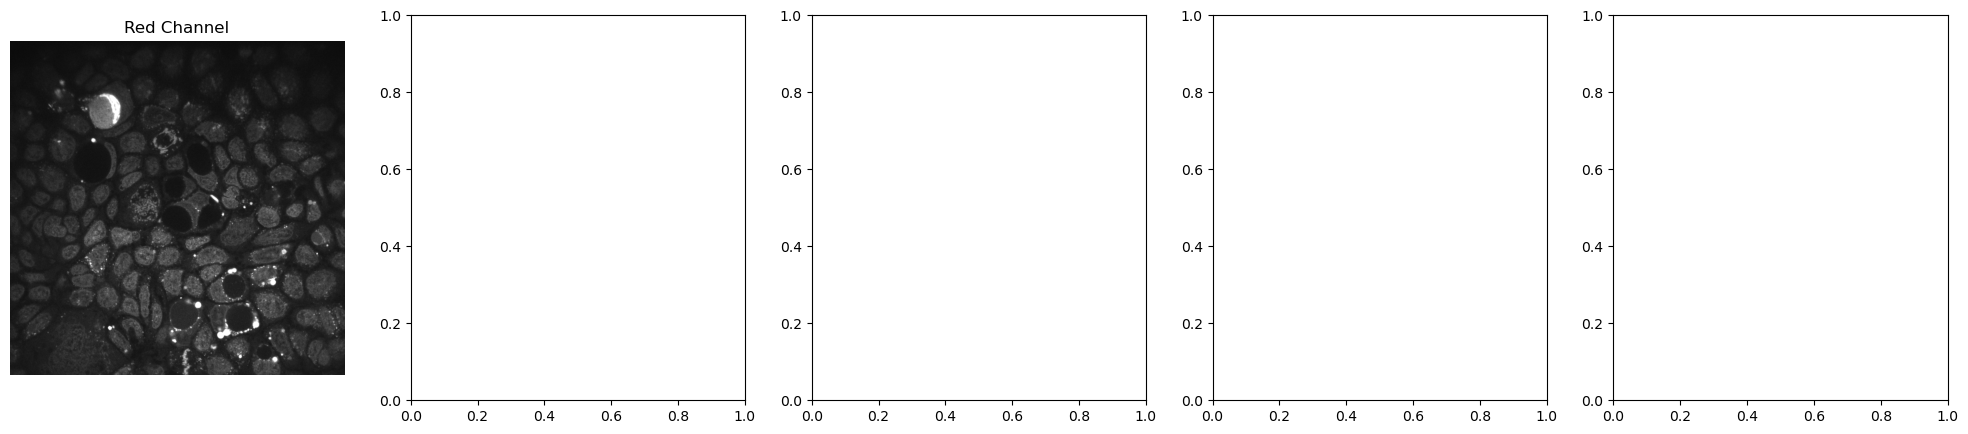

In [7]:

padding_size = 100  # Adjust padding size if necessary


cluster_labels_image = cluster_labels.reshape(enhanced_image.shape)

# Step 4: Post-process the segmented image
# Create an overlay image to highlight the clusters
overlay = np.zeros_like(red_channel)
overlay[cluster_labels_image != -1] = 255  # Highlight the clustered regions

# Remove the padding from the overlay
overlay = overlay[padding_size:-padding_size, padding_size:-padding_size]

# Step 5: Visualize the results
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
axes[0].imshow(red_channel, cmap='gray')
axes[0].set_title('Red Channel')
axes[0].axis('off')

axes[1].imshow(clahe_image, cmap='gray')
axes[1].set_title('CLAHE Image')
axes[1].axis('off')

axes[2].imshow(enhanced_image, cmap='gray')
axes[2].set_title('Enhanced Image')
axes[2].axis('off')

axes[3].imshow(cluster_labels_image, cmap='viridis')
axes[3].set_title('Cluster Labels')
axes[3].axis('off')

axes[4].imshow(overlay, cmap='gray')
axes[4].set_title('Segmented Image')
axes[4].axis('off')

plt.show()

# Save the result if needed
cv2.imwrite('segmented_image.png', overlay)

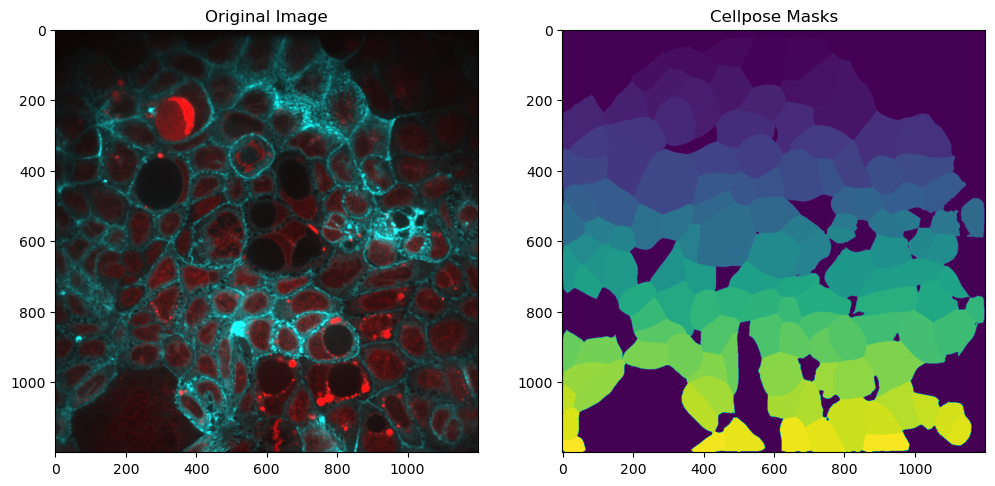

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from cellpose import models, io

# Load the fluorescence microscopy image
image_path = r"/home/amaschio/kuPhysics/aml/image/control/004_z62.png"
img = io.imread(image_path)

# Initialize Cellpose model (you can specify 'cyto' or 'nuclei' models based on your application)
model = models.Cellpose(gpu=True, model_type='cyto')

# Define parameters for the model
channels = [0, 0]  # Grayscale image (modify if using multi-channel images)
diameter = 100  # Estimate of cell diameter (can be None if you want Cellpose to automatically estimate it)

# Run the model on the image to get masks and flows
masks, flows, styles, diams = model.eval(img, diameter=diameter, channels=channels)

# Save the masks to a file
output_path = 'path_to_save_masked_image.png'
io.imsave(output_path, masks)

# Display the original image and the masks
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(masks, cmap='viridis')
ax[1].set_title('Cellpose Masks')
plt.show()
